---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 4 (Supervised Learning, Part II)

https://www.coursera.org/learn/python-machine-learning/home/week/4

http://localhost:8889/notebooks/DataScienceMichigan/c3%20Applied%20Machine%20Learning%20in%20Python/Module%204%20%5BJK%5D.ipynb


## Preamble and Datasets

<IPython.core.display.Javascript object>


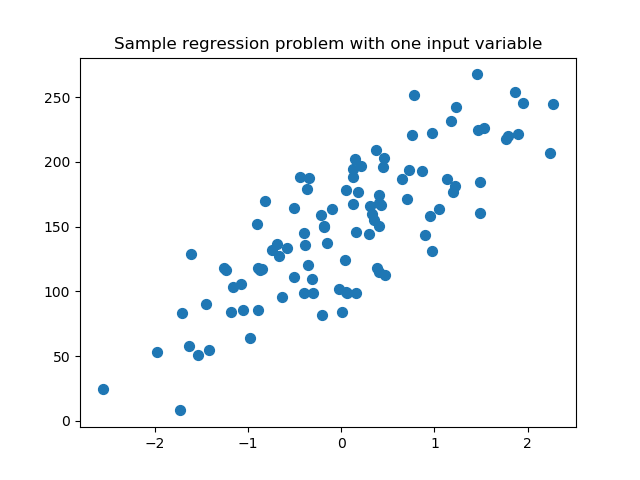

<IPython.core.display.Javascript object>


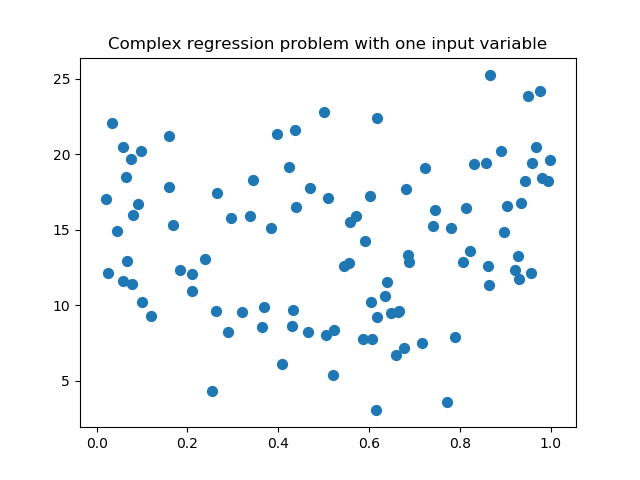

<IPython.core.display.Javascript object>


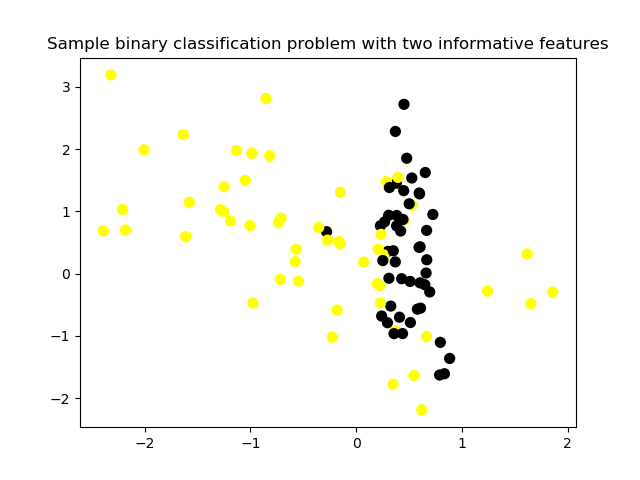

<IPython.core.display.Javascript object>


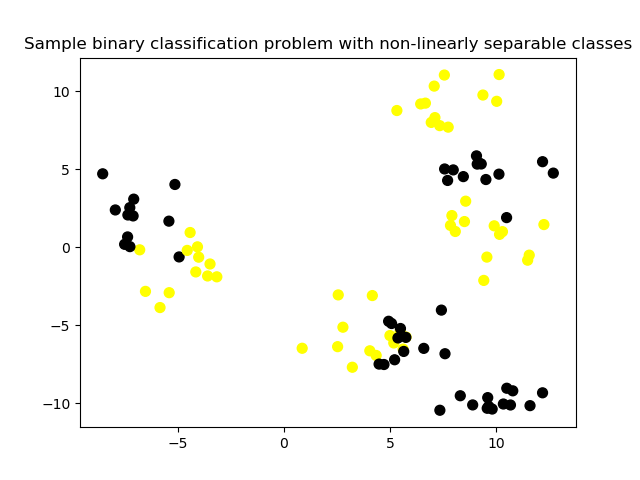

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

## Naive Bayes classifiers
https://www.coursera.org/learn/python-machine-learning/lecture/0XFms/naive-bayes-classifiers

Another family of supervised learning
models that's related to linear classification models is
the Naive Bayes family of classifiers, which are based on simple probabilistic
models of how the data in each class might have been generated. 
Naive Bayes classifiers are called
naive because informally, they make the simplifying assumption that
each feature of an instance is independent of all the others, given the class. In practice, of course, this is _not_ often the case,
as features often are somewhat correlated. 

For example, in predicting whether a house is likely
to sell above the owner's asking price. Some features, such as the are of the
interior rooms are likely to be correlated with other features, such as the size of
the land that the house is built on or the number of bedrooms. And these features in turn might
be correlated with the location of the property, and so on. This naive simplifying assumption
means on the one hand, that learning a Naive Bayes
classifier is __very fast__. Because only simple per class
statistics need to be estimated for each feature and applied for
each feature independently. On the other hand, the penalty for
this efficiency is that the __generalization performance of Naive Bayes Classifiers
can often be a bit worse than other more sophisticated methods__, or
even linear models for classification. 

Even so, especially for
__high dimensional__ data sets, Naive Bayes Classifiers can achieve
performance that's often competitive to other more sophisticated methods, like
support vector machines, for some tasks. 

There are __three__ flavors of
Naive Bayes Classifier that are available in scikit learn. 
<ol>    
<li> The Bernoulli Naive Bayes model uses
a set of binary occurrence features. When classifying texts document for
example, the Bernoulli Naive Bayes model is
quite handy because we could represent the presence or the absence of the given
word in the text with the binary feature. Of course this doesn't take into account
    how often the word occurs in the text. </li>
<li>  So the Multinomial Naive Bayes model
uses a set of count base features each of which does account for how many
times a particular feature such as a word is observed in training example like a document.</li>

In this lecture we won't have
time to cover the Bernoulli or Multinomial Naive Bayes models. However, those models are particularly
well suited to textual data, where each feature corresponds to
an observation for a particular word. And so you'll see Naive Bayes again,
including the Bernoulli and Multinomial models in more depth in the
text mining part of this specialization.

<li>  This lecture will focus on
__Gaussian Naive Bayes classifiers__ which assume features that
are continuous or real-valued. During training, the Gaussian Naive Bayes
Classifier estimates for each feature the mean and standard deviation of
the feature value for each class. For prediction, the classifier compares
the features of the example data point to be predicted with the feature
statistics for each class and selects the class that best
matches the data point. More specifically, the Gaussian Naive
Bayes Classifier assumes that the data for each class was generated by a simple
class specific Gaussian distribution. Predicting the class of a new data
point corresponds mathematically to estimating the probability that
each classes Gaussian distribution was most likely to have
generated the data point. Classifier then picks the class
that has the highest probability. </li>
</ol>

Without going into
the mathematics involved, it can be shown that the decision
boundary between classes in the two class
Gaussian Naive Bayes Classifier. In general is a parabolic
curve between the classes.
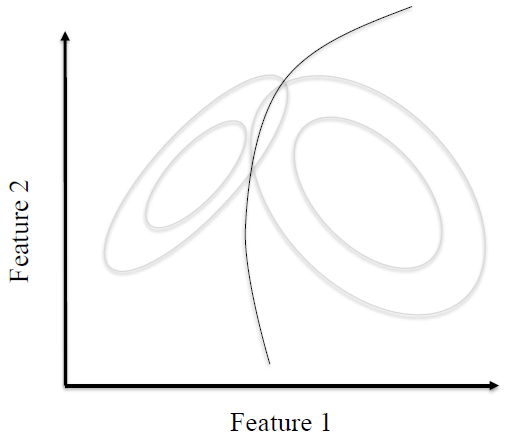

And in the special case where the _variance
of these feature is the same_ for both classes: the decision boundary will be linear. 

Here's what that looks like, typically, on
a simple binary classification data set. 
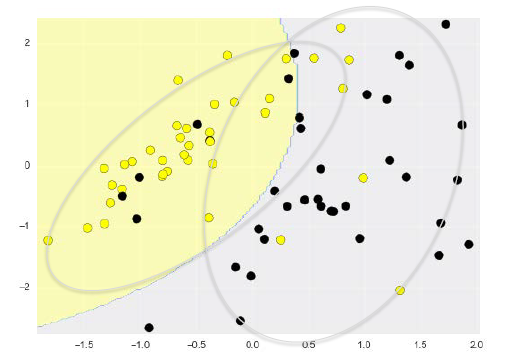
The gray ellipses given idea of the shape
of the Gaussian distribution for each class,
as if we were looking down from above. You can see the centers of
the Gaussian's correspond to the mean value of each feature for
each class.

More specifically, the gray ellipses show the contour
line of the Gaussian distribution for each class, that corresponds to about
two standard deviations from the mean. The line between the yellow and gray background areas represents
the decision boundary. And we can see that this
is indeed parabolic. 

To use the Gaussian Naive Bayes
classifier in Python, we just instantiate an instance
of the Gaussian NB class and call the fit method on the training data just
as we would with any other classifier. It's worth noting that the Naive Bayes
models are among a few classifiers in scikit learn that support
a method called __partial fit__, which can be used instead of fit to
train the classifier incrementally in case you're working with a huge
data set that doesn't fit into memory. More details on that are available in
the scikit learn documentation for Naive Bayes. 

For the Gaussian NB class there are _no
special parameters to control the models complexity_. 


Looking at one example in the notebook
from our synthetic two class dataset, we can see that, in fact, the Gaussian
Naive Bayes classifier achieves quite good performance on this simple
classification example.


<IPython.core.display.Javascript object>


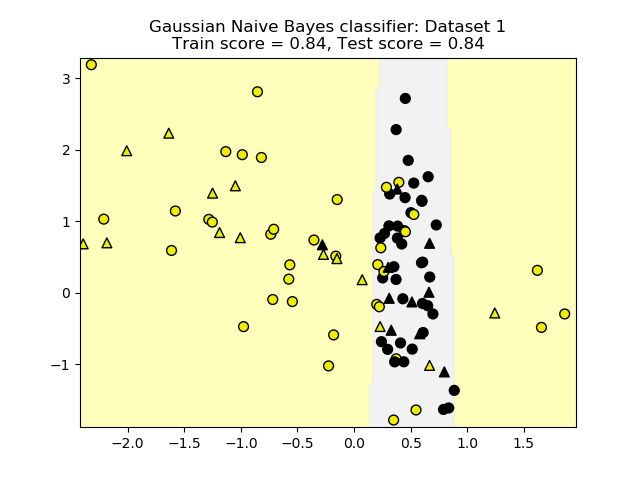

In [3]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')


When the classes are no longer as
easily separable as with this second, more difficult binary example here. Like linear models,
Naive Bayes does not perform as well. 

<IPython.core.display.Javascript object>


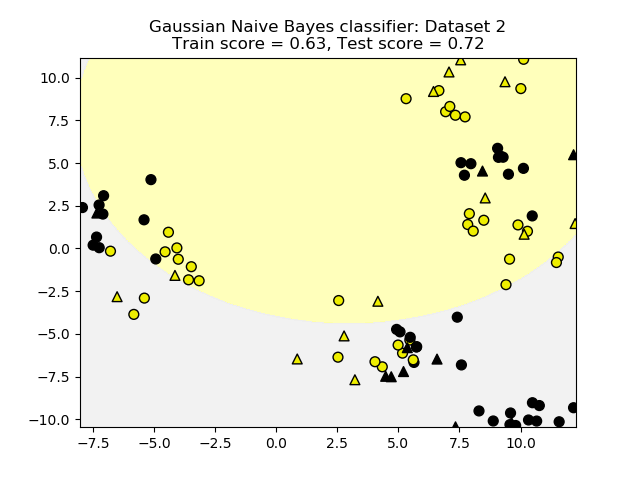

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 2')

### Application to a real-world dataset

On a real world example,
using the breast cancer data set, the Gaussian Naive Bayes Classifier also
does quite well, being quite competitive with other methods,
such as support vector classifiers. 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94



Typically, Gaussian Naive Bayes is
used for high-dimensional data. When each data instance has __hundreds,
thousands or maybe even more features__. 

And likewise the Bernoulli and Nultinomial
flavors of Naive Bayes are used for text classification where there are very
large number of distinct words is features and where the future vectors
are sparse because any given document uses only a small fraction
of the overall vocabulary. There's more in depth
material on the Bernoulli and Multinomial Naive Bayes Classifiers
in the text mining portion of this specialization. 

It can be shown that
Naive Bayes Classifiers are __related__ mathematically to linear models,
so many of the pros and cons of linear models also
apply to Naive Bayes. 
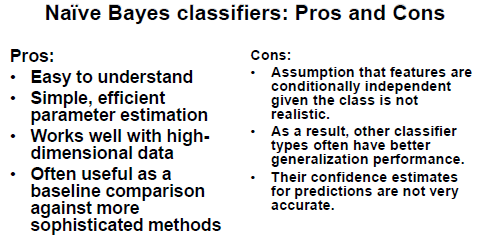
On the positive side Naive Bayes
classifiers are fast to train and use for prediction and thus are well suitable to
high dimensional data including text. And the applications involving very large
data sets where efficiency is critical and computational costs rule out
other classification approaches. 

On the negative side, when the conditional independence
assumption about features doesn't hold. In other words, for a given class, there's
significant covariance among features, as is the case with many
real world datasets. Other more sophisticated classification
methods that can account for these dependencies are likely
to outperform Naive Bayes. 

And on a side note,
when getting confidence or probability estimates
associated with predictions, Naive Bayes classifiers produce
unreliable estimates, typically. Still, Naive Bayes Classifiers can
perform very competitively on some tasks, and are also often very useful as
baseline models against which more sophisticated models can be compared.


## Ensembles of Decision Trees

### Random forests

https://www.coursera.org/learn/python-machine-learning/lecture/lF9QN/random-forests

A widely used and effective method in machine learning involves creating learning models known as ensembles. 

An ensemble takes multiple individual learning models and combines them to produce an aggregate model that is more powerful than any of its individual learning models alone. 

Why are ensembles effective? Well, one reason is that if we have different learning models, although each of them might perform well individually, they'll tend to make different kinds of mistakes on the data set. And typically, this happens because each individual model might overfit to a different part of the data. 

_By combining different individual models into an ensemble, we can average out their individual mistakes to reduce the risk of overfitting while maintaining strong prediction performance._

Random forests are an example of the ensemble idea applied to decision trees. Random forests are widely used in practice and achieve very good results on a wide variety of problems. They can be used as
-  classifiers via the __RandomForestClassifier__ class or for 
-  regression using the __RandomForestRegressor__ class 
- both in the sklearn.ensemble module. 

As we saw earlier, one disadvantage of using a single decision tree was that decision trees tend to be prone to overfitting the training data. As its name would suggest, a random forest creates lots of individual decision trees on a training set, often on the order of tens or hundreds of trees.

The idea is that each of the individual trees in a random forest should do reasonably well at predicting the target values in the training set but should also be constructed to be different in some way from the other trees in the forest. Again, as the name would suggest this difference is accomplished by introducing __random variation__ into the process of building each decision tree. 

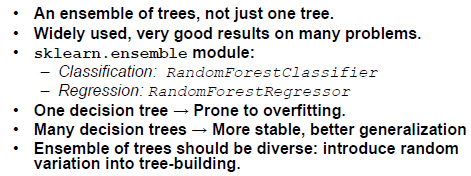



This random variation during tree building happens in __two__ ways. 
<ol>
    <li>First, the data used to _build_ each tree is selected randomly (bootstrap) and </li>
    <li>Second, the features chosen in each split tests are also randomly selected.</li>
</ol>

#### n_estimator (no. bootstrap samples)
To create a random forest model you first decide on how many trees to build. This is set using the __n_estimator__ parameter for _both_ RandomForestClassifier and RandomForestRegressor. 

Each tree were built from a different random sample of the data called the __bootstrap__ sample. 
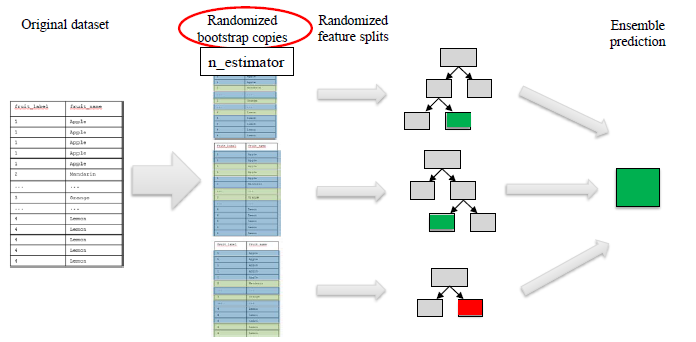

Bootstrap samples are commonly used in statistics and machine learning.

If your training set has N instances or samples in total, a bootstrap sample of size N is created by just repeatedly picking one of the N dataset rows at random _with replacement_, that is, allowing for the possibility of picking the same row again at each selection.

You repeat this random selection process N times. The resulting bootstrap sample has N rows _just like_ the original training set but with possibly some rows from the original dataset missing and others occurring multiple times just due to the nature of the random selection with replacement.

(in Figure below, green rows represent training instances selected. Note variation between bootstrap samples)
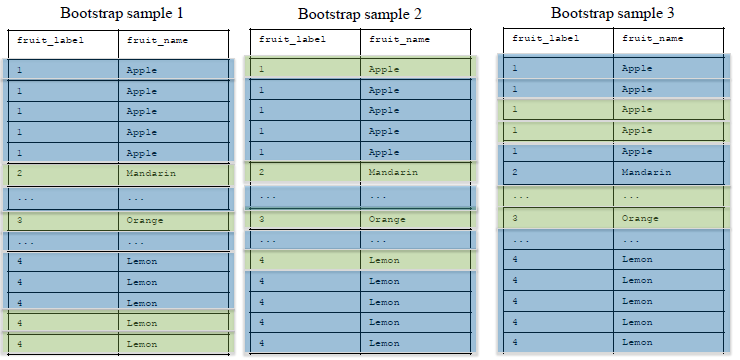




When building a decision tree for a random forest, the process is _almost_ the same as for a standard decision tree but with <font color=red>___one important difference___</font>
-  When picking the best split for a node, instead of finding the _best_ split across all possible features, a _random subset_ of features is chosen and 
-  the best split is found _within_ that smaller subset of features. 

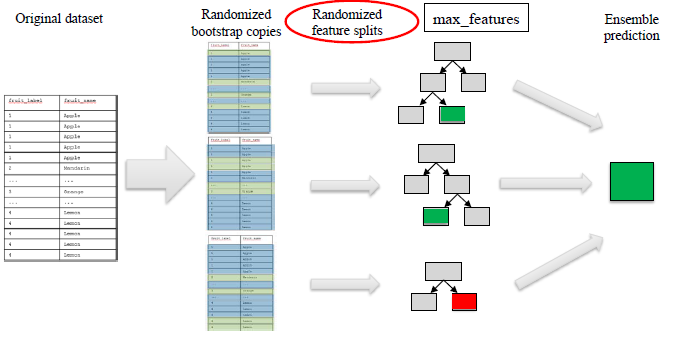

#### max_features (no. features considered at each stage)

The number of features in the subset that are randomly considered at each stage is controlled by the __max_features__ parameter.

- This _randomness_ in selecting the bootstrap sample to train an individual tree in a forest ensemble,
- combined with the fact that splitting a node in the tree is restricted to _random_ subsets of the features of the split, 

virtually _guarantees_ that all of the decision trees and the random forest will be _different_. 

The random forest model is quite __sensitive__ to the __max_features__ parameter.
- If max_features is set to _one_, the random forest is limited to performing a split on the _single_ feature that was selected randomly instead of being able to take the best split over several variables.
    - This means the trees in the forest will likely be very different from each other and possibly with many levels in order to produce a good fit to the data. 
-  On the other hand if max_features is _high_, close to the total number of features that each instance has, the trees in the forest will tend to be similar and probably will require _fewer_ levels to fit the data using the most informative features.

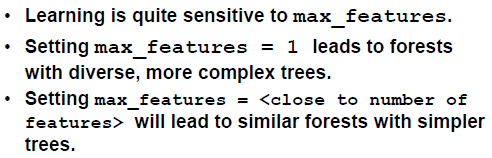

#### Classsification vs. Regression
Once a random forest model is trained, it predicts the target value for new instances by first making a prediction for every tree in the random forest. 
-  For _regression_ tasks, the overall prediction is then typically the __mean__ of the individual tree predictions. 
- For _classification_, the overall prediction is based on a weighted __vote__. 
    - Each tree gives a probability for each possible target class label then the probabilities for each class are averaged across _all_ the trees and the class with the _highest_ probability is the final predicted class.

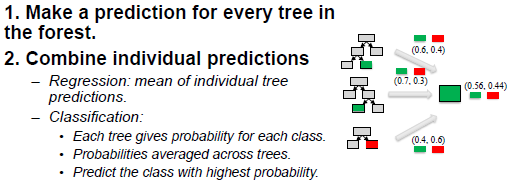

<IPython.core.display.Javascript object>


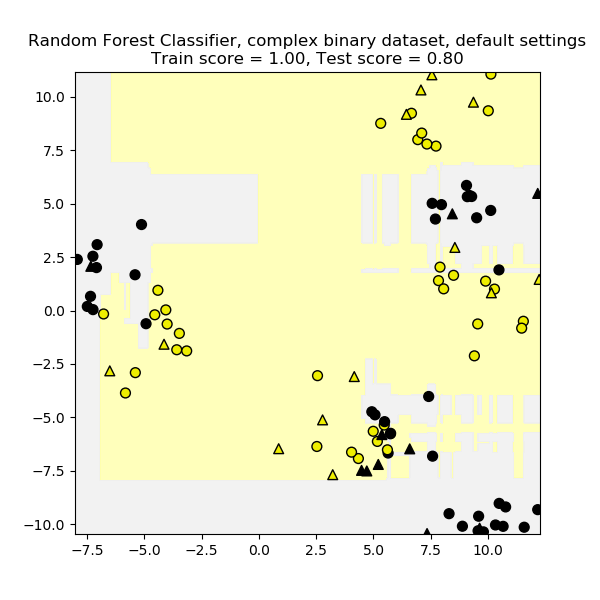

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

#### Random forest: Fruit dataset

Here's an example of learning a random forest of the example fruit dataset using two features, height and width.

Here we're showing the training data plotted in terms of two feature values with 
- height on the x axis and
- width on the y axis. 

As usual, there are four categories of fruit to be predicted.

> Because the number of features is restricted to just two in this very simple example, the randomness in creating the tree ensemble is coming _mostly_ from the bootstrap sampling of the training data.

You can see that the decision boundaries overall have the __box-like shape__ that we associate with decision trees but with some additional detail variation to accommodate specific local changes in the training data. 

Overall, you can get an impression of the increased complexity of this random forest model in capturing _both_ the _global_ and _local_ patterns in the training data compared to the single decision tree model we saw earlier. 

Let's take a look at the notebook code that created and visualized this random forest on the fruit dataset. This code also plots the decision boundaries for the other five possible feature pairs. 

*  Again, to use the RandomForestClassifier we import the random forest classifier class from the sklearn ensemble library. 
-  After doing the usual train test split and setting up the PyPlot figure for plotting, we __iterate through pairs of feature__ columns in the dataset. 
-  For each pair of features we call the fit method on that subset of the training data X using the labels y. 
-  We then use the utility function plot class regions for classifier that's available in the shared module for this course to visualize the training data and the random forest decision boundaries. 



C:\Users\jkang1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\jkang1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


<IPython.core.display.Javascript object>


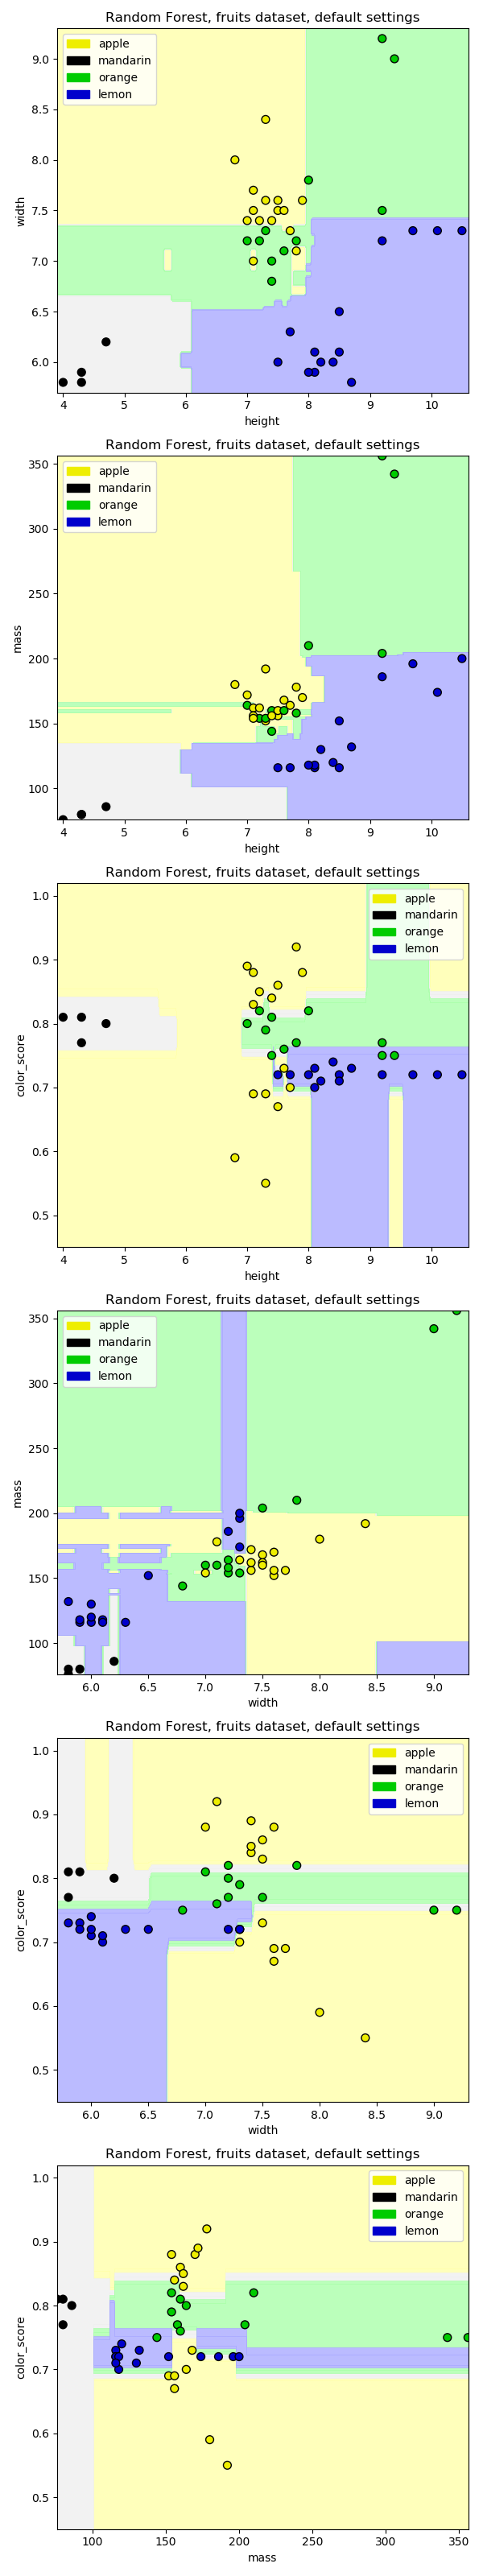

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Random Forests on a real-world dataset

Let's apply random forest to a larger dataset with more features. For comparison with other supervised learning methods, we use the breast cancer dataset again.

We create a new random forest classifier and since there are about 30 features, we'll set __max_features__ to eight to give a diverse set of trees that also fit the data reasonably well.

We can see that random forest with __no feature scaling or extensive parameter tuning__ achieve very good test set performance on this dataset, in fact, it's _as good or better than_ all the other supervised methods we've seen so far including current life support vector machines and neural networks that require more careful tuning. 

>Notice that we did _not_ have to perform scaling or other pre-processing as we did with a number of other supervised learning methods. This is one advantage of using random forests. 

Also note that we passed in a fixed value for the random state parameter in order to make the results __reproducible__. If we _didn't_ set the random state parameter, the model would likely be different each time due to the randomized nature of the random forest algorithm. 

In [8]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.99



So, on the _positive_ side, random forest are 
- widely used because they're very powerful.
- They give excellent prediction performance on a wide variety of problems and 
- they _don't_ require careful scaling of the feature data or extensive parameter tuning.
- And even though building many different trees requires a corresponding increase in computation, building random forests is easily parallelizable across multiple CPU's. 

On the _negative_ side while random forests do inherit many of the benefits of decision trees, one big difference is that 
- random forest models can be very difficult for people to interpret making it difficult to see the predictive structure of the features or to know why a particular prediction was made. 
- In addition, random forests are not a good choice for tasks that have very high dimensional sparse features like text classification, where linear models can provide efficient training and fast accurate prediction.

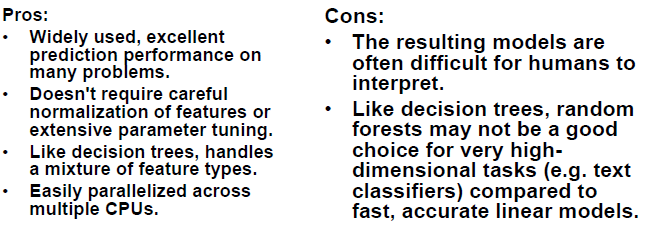


#### Key parmeter recap
So to recap, here are some of the key parameters that you'll need for using random forests. 

1. __n_estimators__ sets the number of trees to use. 
    - The default value for n_estimators is 10 and increasing this number for larger data sets is almost certainly a good idea since ensembles that can average over more trees will _reduce overfitting._ 
    - Just bear in mind that increasing the number of trees in the model will also increase the computational cost of training. You'll use more time and more memory. So in practice you'll want to choose the parameters that make best use of the resources available on your system.
2. As we saw earlier, the __max_features__ parameter has a strong effect on performance.
    - It has a large influence on how _diverse_ the random trees in the forest are. 
    - Typically, the default setting of max features, which for __classification__ is the square root of the total number of features and for __regression__ is the log base two of the total number of features, works quite well in practice although explicitly adjusting max_features may give you some additional performance gain with _smaller values_ of max_features tending to reduce overfitting.
3. The __max_depth__ parameter controls the depth of each tree in the ensemble.
    - The default setting for this is none, in other words, the nodes in a tree will continue to be split until all leaves contain the same class (i.e., pure) __or__ have fewer samples than the minimum sample split parameter value (min_samples_split), which is two by default.
4. Most systems now have a multi-core processor and so you can use the __n_jobs__ parameter to tell the random forest algorithm how many cores to use in parallel to train the model. 
    - Generally, you can expect something close to a linear speed up. So, for example, if you have four cores, the training will be four times as fast as if you just used one.
    - If you set end jobs to negative one it will use all the cores on your system and setting end jobs to a number that's more than the number of cores on your system won't have any additional effect.
5. Finally, given the random nature of random forests, if you want reproducible results it's especially important to choose a fixed setting for the random state parameter. In the examples we've shown here we typically set __random_state__ to zero but any fixed number will work just as well.

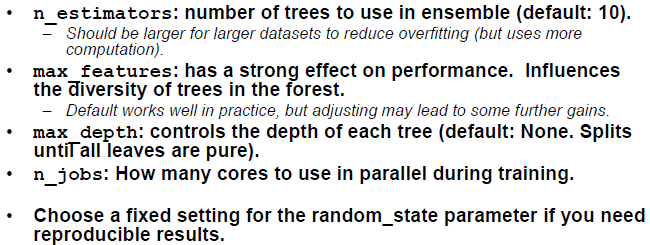

### Gradient-boosted decision trees
https://www.coursera.org/learn/python-machine-learning/lecture/emwn3/gradient-boosted-decision-trees

Another tree based ensemble method that's gain wide use in real world application is gradient boosted decision trees. Like random forest, gradient boosted trees used an ensemble of multiple tress to create more powerful prediction models for classification and regression.

In this lecture, we'll provide a brief overview of gradient boosted decision trees, along with the discussion of their key parameters, the control model complexity. 

Unlike the random forest method that builds and combines a forest of randomly different trees in parallel, the _key idea_ of gradient boosted decision trees is that they build a __series__ of trees, ___where each tree is trained, so that it attempts to correct the mistakes of the previous tree in the series.___

Typically, gradient boosted tree ensembles use lots of shallow trees known in machine learning as _weak learners_, built in a nonrandom way, to create a model that makes fewer and fewer mistakes as more trees are added. Once the model is built, making predictions with a gradient boosted tree models is fast and doesn't use a lot of memory. Like random forests, the number of estimators in the gradient boosted tree ensemble is an important parameter in controlling model complexity. 

A _new_ parameter that does not occur with random forest is something called the __learning rate__. The learning rate controls how the gradient boost the tree algorithms, builds a series of collective trees. 

-  When the learning rate is _high_, each successive tree put _strong_ emphases on correcting the mistakes of its predecessor. And thus may result in a more complex individual tree, and those overall are more complex model. 

-  With _smaller_ settings of the learning rate, there's _less_ emphasis on thoroughly correcting the errors of the previous step, which tends to lead to simpler trees at each step. 

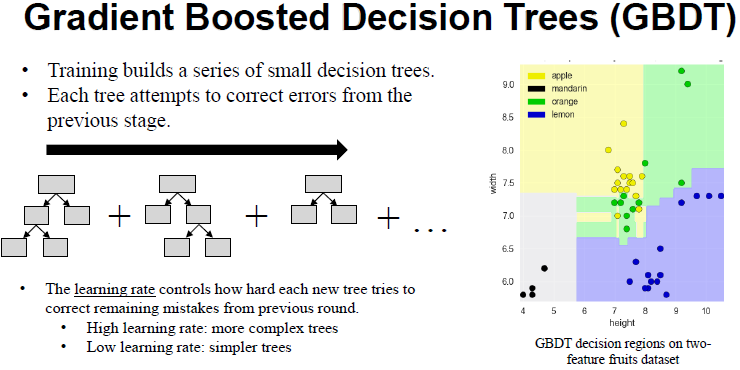


<IPython.core.display.Javascript object>


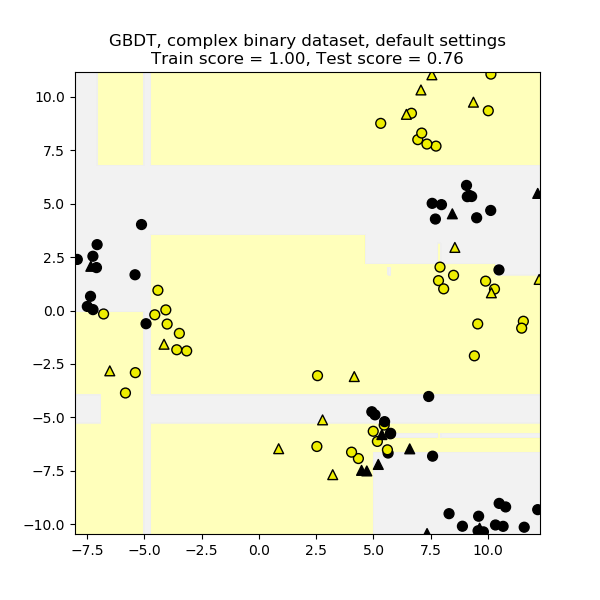

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

#### Gradient boosted decision trees on the fruit dataset

Here's an example showing how to use gradient boosted trees in scikit-learn on our sample fruit classification test, plotting the decision regions that result. The code is more or less the same as what we used for random forests.

-  But from the sklearn.ensemble module, we import the GradientBoostingClassifier class.
-  We then create the GradientBoostingClassifier object, and fit it to the training data in the usual way. 
-  By default, the learning rate parameter is set to 0.1, the n_estimators parameter giving the number of trees to use is set to 100, and the max depth is set to 3.

As with random forests, you can see the decision boundaries have that box-like shape that's characteristic of decision trees or ensembles of trees. 

C:\Users\jkang1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\jkang1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


<IPython.core.display.Javascript object>


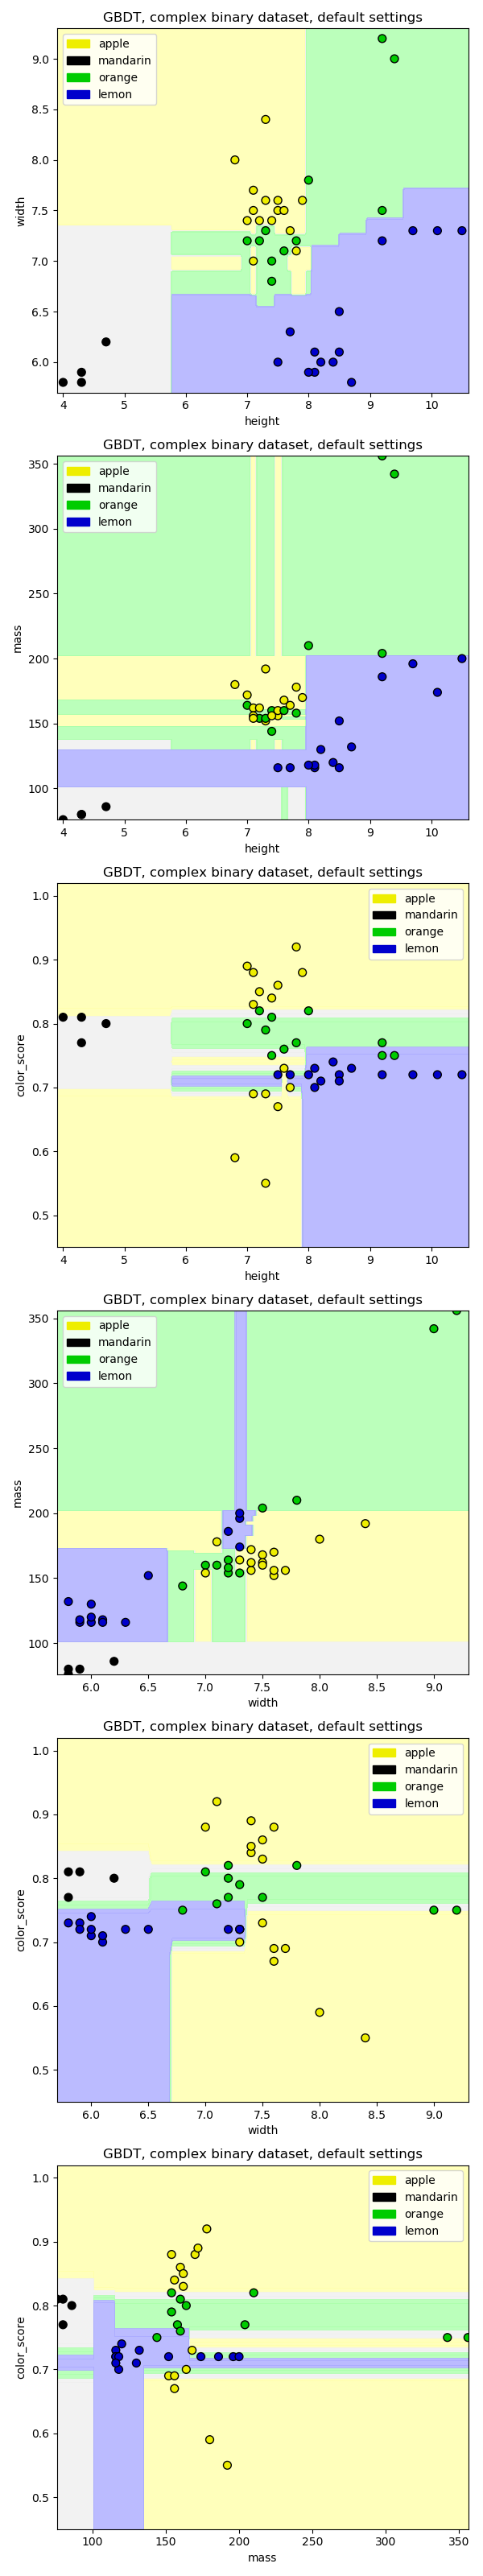

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.as_matrix(),
                                                   y_fruits.as_matrix(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Gradient-boosted decision trees on a real-world dataset

Now let's apply gradient boosted decision trees to the breast cancer dataset. This code trains two different gradient boosted classifiers.

The first one uses the default settings. We can see that the first result has perfect accuracy on the training set, which indicates the model is likely overfitting. 

Two ways to learn a _less complex_ gradient boosted tree model are, 
<ol> 
    <li>to reduce the __learning_rate__, so that each tree doesn't try as hard to learn a more complex model, that fixes the mistakes of its predecessor.</li>
    <li>And to reduce the __max_depth__ parameter for the individual trees in the ensemble.</li>
    </ol>

The second classifier example makes these changes in the parameters. 
And you can see, that the training set accuracy does decrease, while the test set accuracy increases slightly. 


In [10]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.96

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


- Gradient boosted decision trees are among the best off-the-shelf supervised learning methods available, achieving excellent accuracy with only modest memory and runtime requirements to perform prediction, once the model has been trained. 
    - Some major commercial applications of machine learning have been based on gradient boosted decision trees. 
    -  Like other decision tree based learning methods, you don't need to apply feature scaling for the algorithm to do well. And the futures can be a mix of binary, categorical and continuous types. 
    
    
-  Boosted decision trees do have several downsides.
    - So like random forests, ensembles of trees are very difficult for people to interpret, compared to individual decision trees. However, this often may not matter for many applications where prediction accuracy is the most important goal.
    - Gradient boosted methods can require careful tuning of the learning rate and other parameters. And the training process can require a lot of computation. And like the other tree based methods we saw, using gradient boosted methods for text classification or other scenarios where the feature space has thousands of features with sparse values, is usually not a good choice for accuracy and computational cost reasons. 
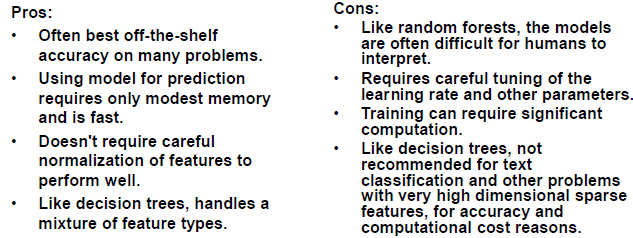


The key parameters controlling model complexity for gradient boosted tree models are, 

-  __n_estimators__ which sets the number of small decisions trees the week learns to use in the ensemble,
-  and the __learning rate__. Typically, these two parameters are tuned together since making the learning rates smaller, will require more trees to maintain model complexity.
-  _Unlike_ random forest, increasing an __n_estimators__ can lead to __overfitting__. So typically, the n_estimators setting is chosen to best exploit the speed and memory capabilities of the system during the training. And other parameters like the learning rate are then adjusted, given that fixed an n_estimators setting.
-  The __max_depth__ parameter can also have an effect of model complexity, but controlling the depth, and has a complexity of the individual trees. The gradient boosting method assumes, that each trees is a weak learner, and so the max_depth parameter is usually quite _small_, on the order of three to five, for most applications.
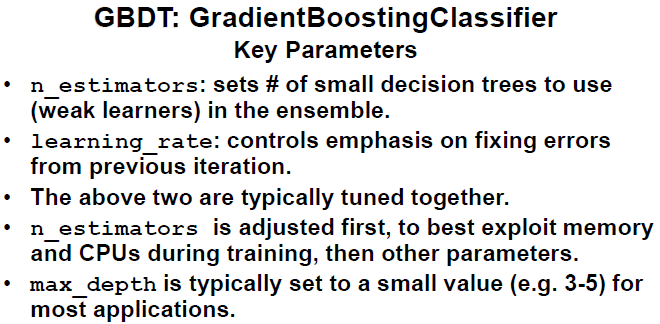

## Neural networks

In this part of the course, you'll get an introduction to the basics of neural networks. Which are a broad family of algorithms that have formed the basis for the recent resurgence in the computational field called deep learning. Early work on neural networks actually began in the 1950s and 60s. And just recently, has experienced a resurgence of interest, as deep learning has achieved impressive state-of-the-art results on specific tasks that range from object classification in images, to fast accurate machine translation, to gameplay. 

The topic of neural networks requires its own course. And indeed, if you're interested in more depth, you can check out the excellent course on Coursera. Called Neural Networks for Machine Learning, by a pioneer in this area, Professor Jeff Hinton. 

Here, we'll provide an introduction to the basic concepts and algorithms that are foundation of neural networks, and of the much more sophisticated deep learning methods in use today. You'll learn about some basic models called __multi-layer perceptrons (MLP)__, supported by scikit-learn, that can be used for classification and regression. 

Let's start by briefly reviewing simpler methods we have already seen for regression and classification. Linear regression and logistic regression, which we show graphically here. 

- Linear regression predicts a continuous output, y hat, shown as the box on the right. As a function as the sum of the input variables xi, shown in the boxes on the left. Each weighted by a corresponding coefficient, wi hat, plus an intercept or bias term, b hat. We saw how various methods like ordinary least squares, ridge regression or lasso regression. Could be used to estimate these model coefficients, wi hat and b hat, shown above the arrows in the diagram, from training data.

- Logistic regression takes this one step further, by running the output of the linear function of the input variables, xi, through an additional nonlinear function, the __logistic function__ --represented by the new box in the middle of the diagram--to produce the output, y. Which, because of the logistic function, is now constrained to lie between zero and one.

We use logistical regression for binary classification, since we can interpret y as the probability that a given input data instance belongs to the positive class, in a two-class binary classification scenario.
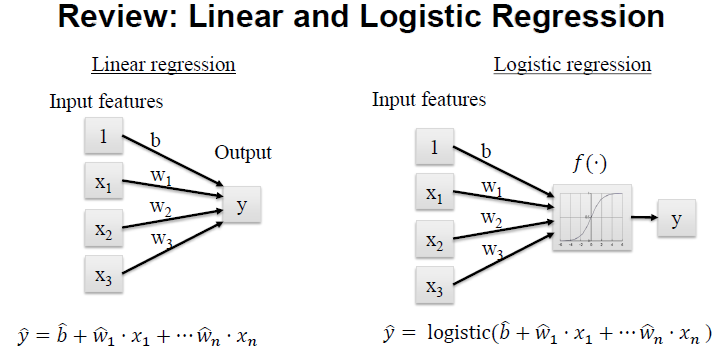



Here's an example of a simple neural network for regression, called a __multi-layer perceptron__, which I will sometimes abbreviate by MLP. These are also known as __feed-forward neural networks__. 

MLPs take this idea of computing weighted sums of the input features, like we saw in logistic regression. But it takes it a step beyond logistic regression, by 
- adding an additional processing step called a __hidden layer__, represented by this additional set of boxes, h0, h1, and h2 in the diagram. These boxes, within the hidden layer, are called hidden units.
- And each hidden unit in the hidden layer computes a _nonlinear_ function of the _weighted_ sums of the input features, resulting in intermediate output values, v0, v1, v2. 
- Then the MLP computes a weighted sum of these hidden unit outputs, to form the final output value, Y hat. 

This nonlinear function that the hidden unit applies is called the __activation function__. In this example, your activation function is the hyperbolic tangent function, which is related to the logistic function. 

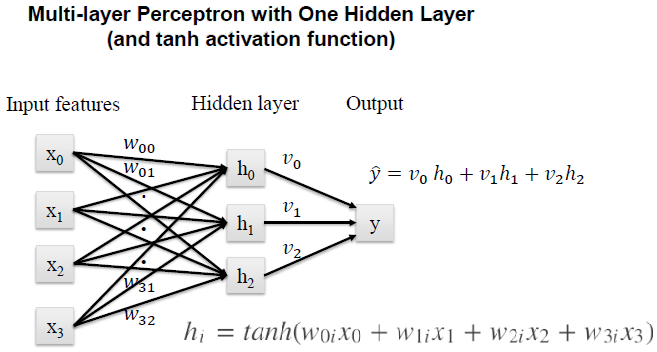

You can see that the result of adding this additional hidden layer processing step to the prediction model, is a formula for y hat that is already more involved than the one for logistic regression. Now predicting y involves computing a different initial weighted sum of the input feature values for each hidden unit, which applies a nonlinear activation function. And then all of these nonlinear outputs are combined, using another weighted sum, to produce y. 

In particular, there's __one weight between each input and each hidden unit__. And __one weight between each hidden unit and the output variable__. 

In fact, this addition and combination of non-linear activation functions allows multi-layer perceptrons to learn more complex functions than is possible with a simple linear or logistic function. This additional expressive power enables neural networks to perform more accurate prediction when the relationship between the input and output is itself complex. 

Of course, this complexity also means that there are a lot more weights, model coefficients, to estimate in the training phase. Which means that both _more_ training data and more computation are typically needed to learn in a neural network, compared to a linear model. 


#### Activation functions


As an aside, there are a number of choices for the activation function in a neural network, that gets applied in hidden units. Here, the plot shows the input value coming into the activation function, from the previous layer's inputs on the x-axis. And the y-axis shows the resulting output value for the function. 
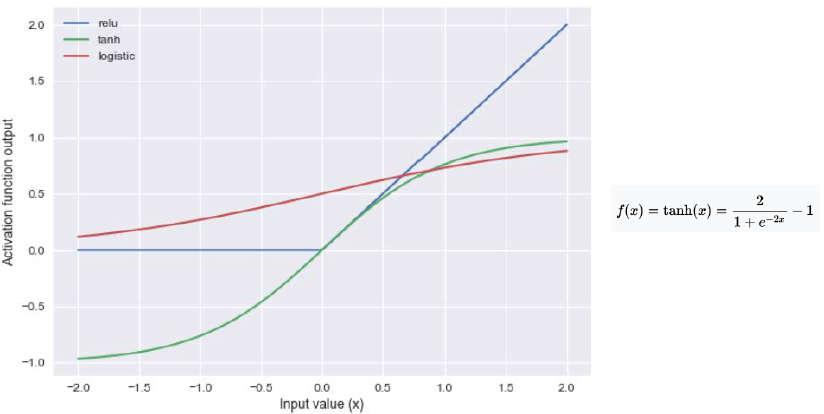

This code to plot this example is available in the accompanying notebook. 

The three main activation functions we'll compare later in this lecture are the
<ol>
    <li> __hyperbolic tangent (tanh)__. That's the S-shaped function in <font color='green'>green</font>.</li>
    <li> The __rectified linear unit function (ReLU)__, which I'll abbreviate to relu, shown as the piecewise linear function in <font color='blue'>blue</font>.</li>
    <li> And the familiar __logistic function__, which is shown in <font color='red'>red</font>.</li>
</ol>
        
The __relu__ activation function is the default activation function for neural networks in scikit-learn. It maps any negative input values to zero. 

The __hyperbolic tangent__ function, or tanh function maps
- large _positive_ input values to outputs very close to one. 
- And large _negative_ input values, to outputs very close to negative one. 

These differences in the activation function can have some effect on the shape of regression prediction plots. Or classification decision boundaries that neural networks learn. 

In general, we'll be using either the hyperbolic tangent or the relu function as our default activation function, since these perform well for most applications. 


<IPython.core.display.Javascript object>


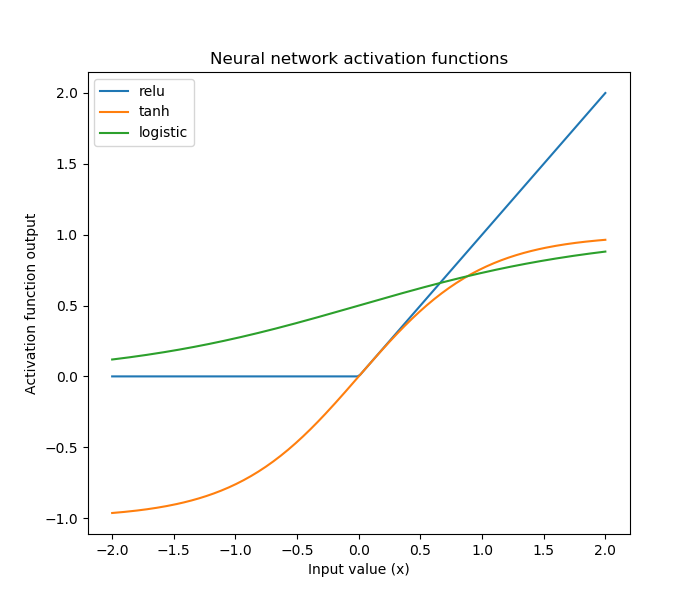

In [12]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

### Neural networks: Classification


Let's take a look at how we use neural networks in scikit-learn for classification. Using the more complex synthetic binary classification data set.

#### Synthetic dataset 1: single hidden layer

To use a neural network classifier, you
- import the MLPClassifier class from the sklearn.neural_network module. 
- This code example shows the classifier being fit to the training data, using a single hidden layer with three different numbers of hidden units in the layer, 1 unit, 10 units and 100 units. 
- As with all other classification types we've seen, you can create the classifier objects with the appropriate parameters.
- And call the fit method on the training data.

Here, the main parameter for a neural network classifier is this parameter, __hidden_layer_sizes__. This parameter is a list, with one element for each hidden layer, that gives the number of hidden units to use for that layer. 

So here we're passing a list with a single element. Meaning we want one hidden layer, using the number in the variable called units.

- By default, if you don't specify the __hidden_layer_sizes__ parameter, scikit-learn will create a _single_ hidden layer with 100 hidden units.
    - While a setting of 10 may work well for simple data sets, like the one we use as examples here. For really complex data sets, the number of hidden units could be in the thousands.
    - It's also possible, as we'll see shortly, to create an MLP with _more_ than one hidden layer. By passing a __hidden_layer_sizes__ parameter with __multiple__ entries. 
- I want to also note the use of this extra parameter, called __solver__, which specifies the algorithm to use for learning the weights of the network. Here, we're using the __lbfgs__ algorithm. We'll discuss the solver parameter setting further, at the end of this lecture. 
- Also note that we're passing in a __random_state__ parameter, when creating the MLPClassifier object, like we did for the train-test split function. And we happened to set this random state parameter to a fixed value of zero. This is because for neural networks, their weights are _initialized randomly_, which can affect the model that is learned. Because of this, even without changing the key parameters on the same data set, the same neural network algorithm might learn _two different_ models depending on the value of the internal random seed that is chosen. So by always setting the same value for the random seed used to initialize the weights, we can assure the results will always be the same, for everyone using these examples. 

This graphic plots the results of running this code. To show how the number of hidden units in a single layer in the neural network affects the model complexity for classification. 
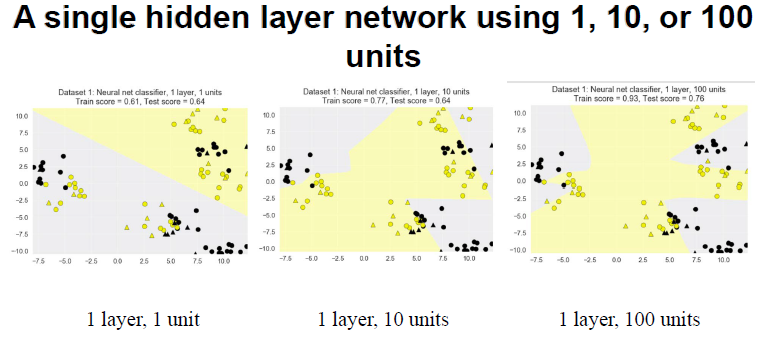
- With a _single_ hidden unit, the model is ___mathematically equivalent to logistic regression.___ We see the classifier returns the familiar simple __linear decision__ boundary between the two classes. The training set score's low, and the test score is not much better, so this network model is under-fitting.
- With _ten_ hidden units, we can see that the MLPClassifier is able to learn a more complete decision boundary. That captures more of the nonlinear, cluster-oriented structure in the data, though the test set accuracy is still low. 
- With _100_ hidden units, the decision boundary is even more detailed. And achieves much better accuracy, on both the training and the test sets.

<IPython.core.display.Javascript object>


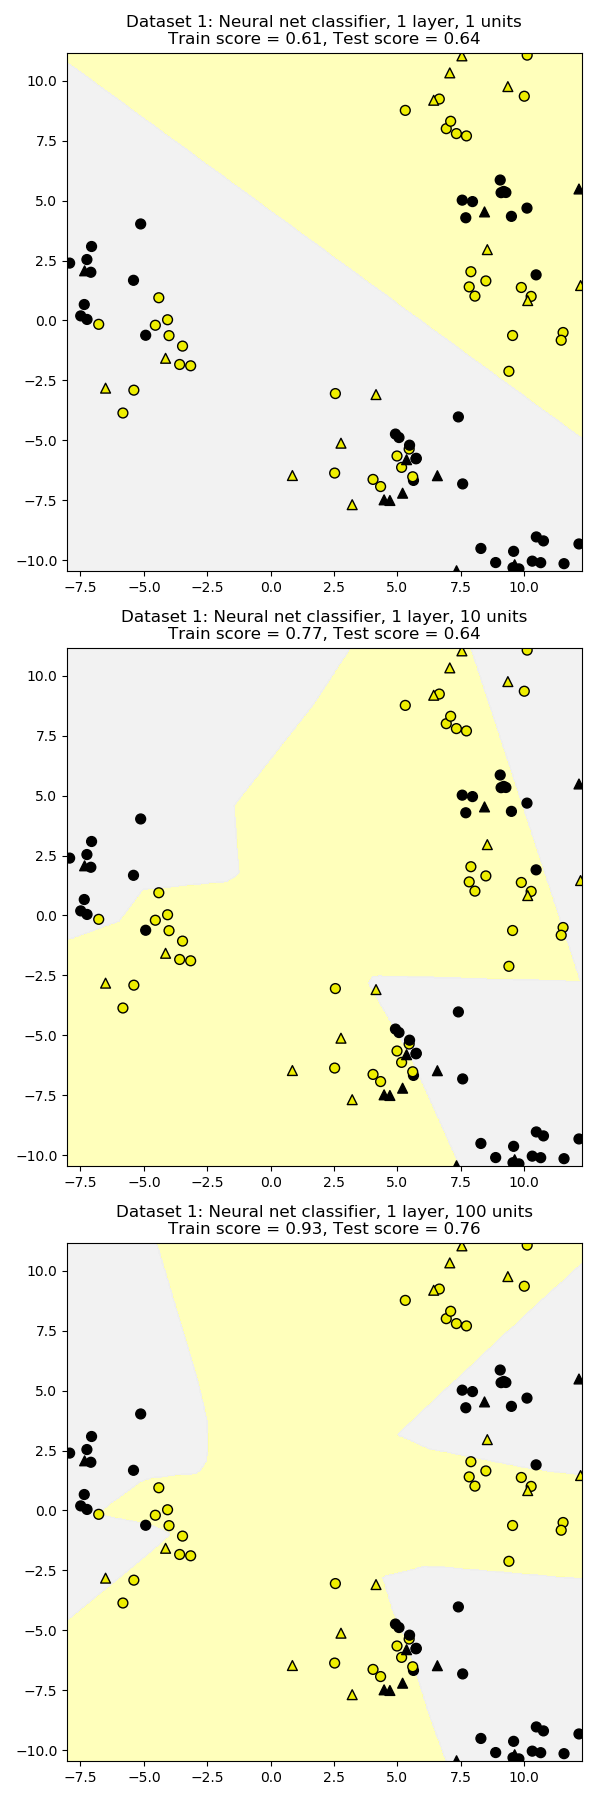

In [13]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

#### Synthetic dataset 1: two hidden layers

Here's a graphical depiction of a multi-layer perceptron with two hidden layers.

Adding the _second_ hidden layer further increases the complexity of functions that the neural network can learn, from more complex data sets. Taking this complexity further, large architectures of neural networks, with many stages of computation, are why deep learning methods are called deep. 

And we'll summarize deep learning, in an upcoming lecture for this week.

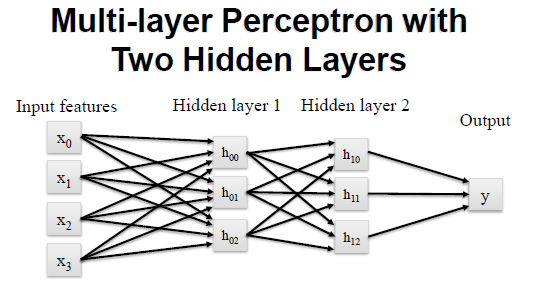


Here is an example in the notebook, showing how we create a __two-layer MLP__, with 10 hidden units in each layer. 

We just set the __hidden_layer_sizes__ parameter, when creating the MLPClassifier, to a _two-element_ list, indicating ten units, in each of the two hidden layers. You can see the result of of adding the second hidden layer, on the classification problem we saw earlier.
- On the _left_ is the original MLP, with one hidden layer of ten units.

- And on the _right_ is the same data set, using a new MLP with two hidden layers of ten units each.
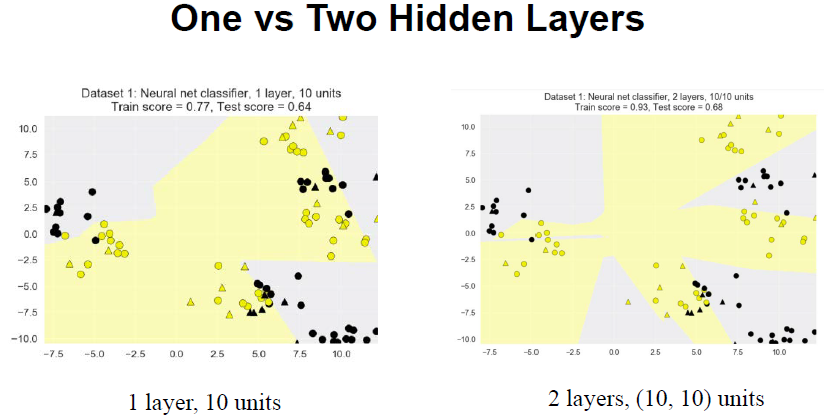

You can see the MLP with two hidden layers learned a _more complex_ decision boundary. And achieved, in this case, a much better fit on the training data, and slightly better accuracy on the test data.

<IPython.core.display.Javascript object>


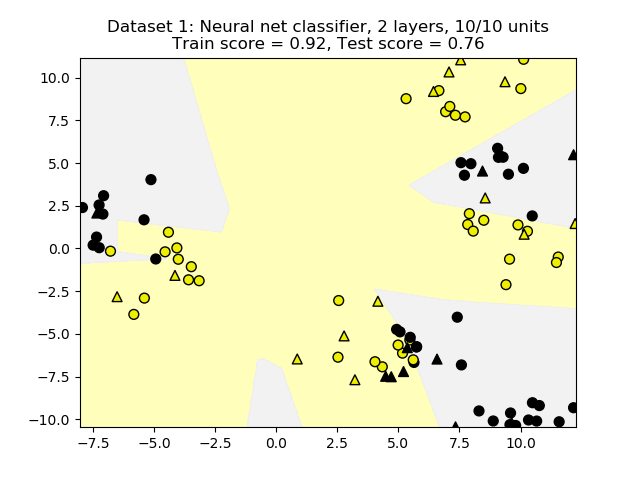

In [14]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

#### Regularization parameter: alpha

Once we start adding more hidden layers, with lots of hidden units, you can see that the number of weights, or model coefficients, to estimate for a neural network can __increase rapidly__. So that more complex neural networks could have many thousands of weights to estimate. 

We can control this model complexity, just as we did with ridge and lasso regression, by adding an __L2 regularization penalty on the weights__. 
> Remember that L2 regularization penalizes models that have a large sum of squares of all the weight values, with the effect being, that the neural network prefers models with more weights shrunk close to zero. 

The regularization parameter for MLPs is called __alpha__, like with the linear regression models. And in scikit-learn, it's set to a small value by default, like 0.0001, that gives a little bit of regularization. 

This code example shows the effects of changing alpha for a larger MLP, with 2 hidden layers of 100 nodes each from a small value of 0.01, to a larger value of 5.0. 

For variety here, we're also setting the activation function to use the __hyperbolic tangent__ function. 

Here's the graphical output of this notebook code. You can see the effect of increasing regularization with increasing alpha.

- In the _left_ plot, when alpha is small, the decision boundaries are much more _complex and variable_. And the classifier's over-fitting, as we can see from the very high training set score, and low test score.
- On the other hand, the _right_ plot uses the largest value of alpha here, alpha 5.0. And that setting results in much _smoother_ decision boundaries, while still capturing the global structure of the data. And this increased simplicity allows it to generalize much better, and not over-fit to the training set. And this is evident from the much higher test score, in this case. 

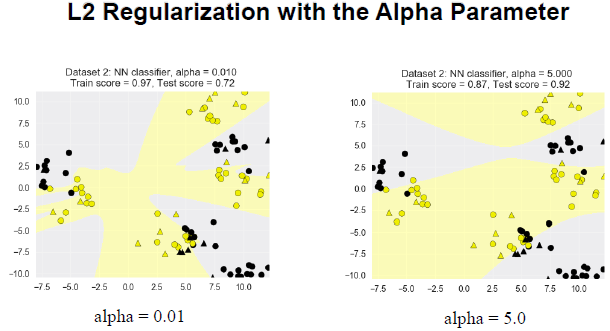

<IPython.core.display.Javascript object>


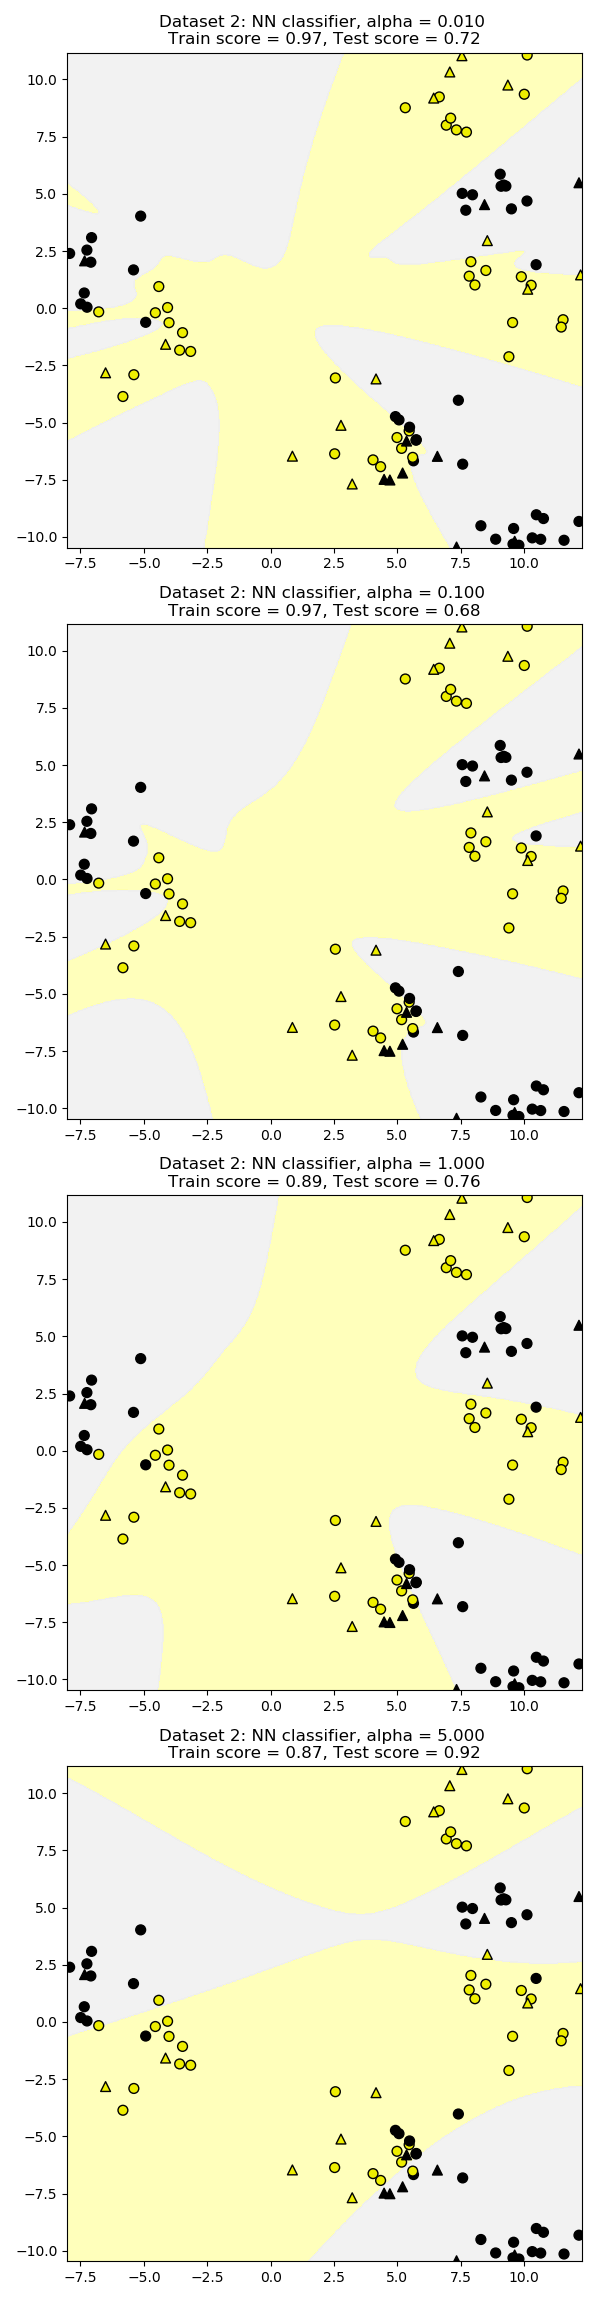

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    

#### The effect of different choices of activation function

<IPython.core.display.Javascript object>


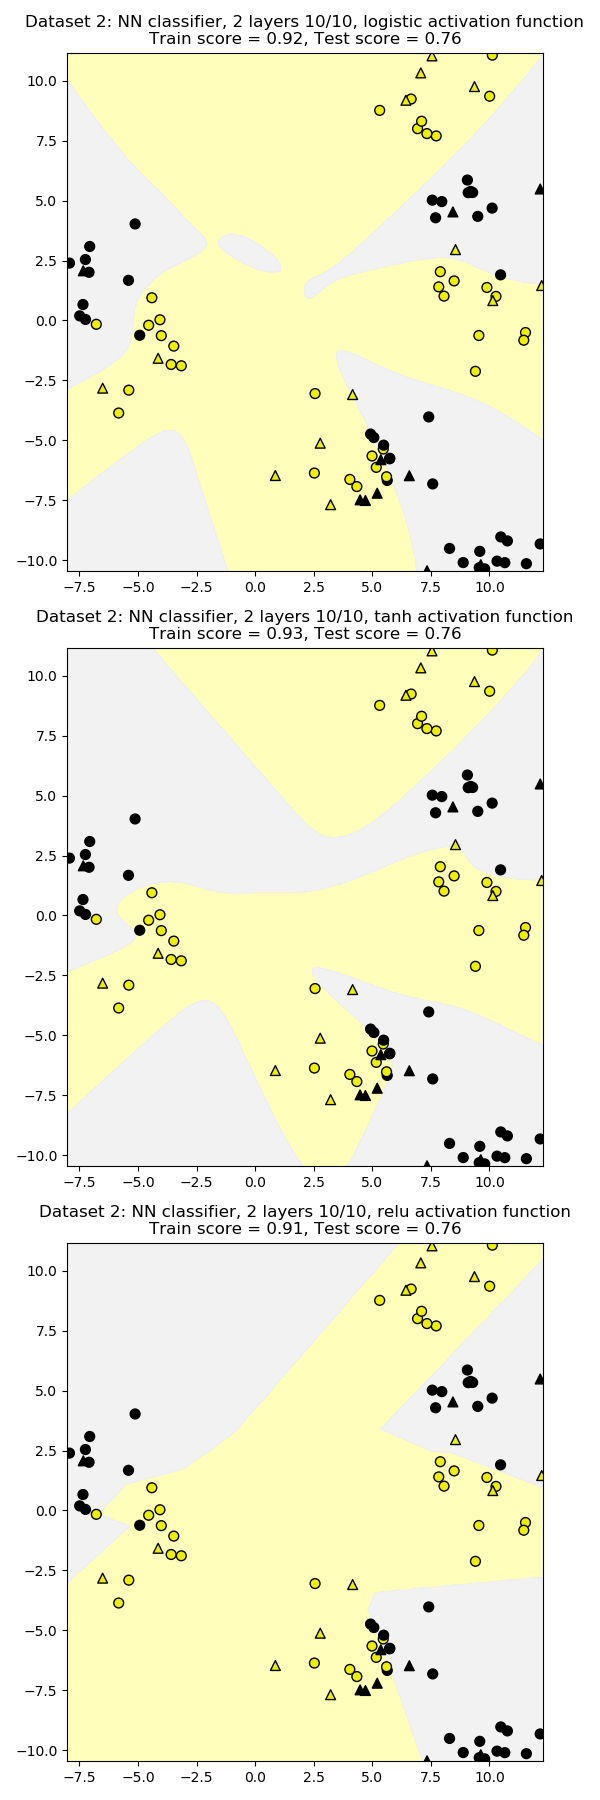

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = this_activation,
                         alpha = 0.1, hidden_layer_sizes = [10, 10],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

#### Application to real-world dataset for classification

As with other supervised learning models, like regularized regression and support vector machines, it can be critical, when using neural networks, to __properly normalize__ the input features. Let's apply the multi-layer perceptron to the __breast cancer__ data set. 

And notice that we _first_ apply the MinMaxScaler, to pre-process the input features.

Here we'll combine a more complex network, using 2 hidden layers with 100 units each, with a higher regularization setting of alpha at 5.0, and using the __lgbfs__ solver again. You can see, that with this multi-layer perceptron, both the training and test set accuracy are among the _highest_ we have obtained on this data set. 

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.97


### Neural networks: Regression

Like many of the other supervised learning methods we've seen, you can also use multi-layer perceptrons for __regression__, as well as classification. 

We're including MLP regression here, as an example, for two reasons. 
- First, because MLP regression may be useful for some regression problems on its own. 
- But more generally, because some deep learning problems are regression problems. And so, as with classification, using multi-layer perceptrons is a good starting point to learn about the more complex architectures used for regression in deep learning. 

Here's the example of a simple MLP regression model, in our notebook. 

You use the multi-layer perceptron regressor by
- importing the MLPRegressor class from the sklearn.neural_network module, and then 
- creating the MLPRegressor object. When creating the object here, we're setting the number of hidden layers and units within each hidden layer using the same __hidden_layer_sizes__ parameter that we used for classification. 

This example uses two hidden layers, with 100 hidden nodes each.

This notebook code has a loop that cycles through different settings of the activation function parameter, and the alpha parameter for L2 regularization. 

Here we've included regression results that use, in the top row, the __hyperbolic tangent__ activation function. And in the bottom row, the __relu__ activation function. 
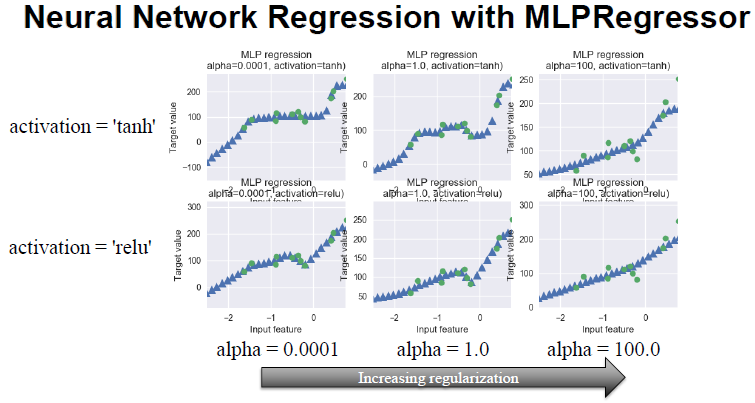


You can see the smoothness of the activation function somewhat influences the smoothness of the corresponding regression results. Along the columns, the plots also show the effect of using different alpha settings, to increase the amount of L2 regularization from left to right. 

Again, as with classification, the effect of increasing the amount of L2 regularization, by increasing alpha, is to constrain the regression to use _simpler and simpler_ models, with _fewer and fewer_ large weights. 

You can see this effect for both activation functions, in the top and bottom rows. The regression line on the left has higher variance than the much smoother, regularized model on the right. 

<IPython.core.display.Javascript object>


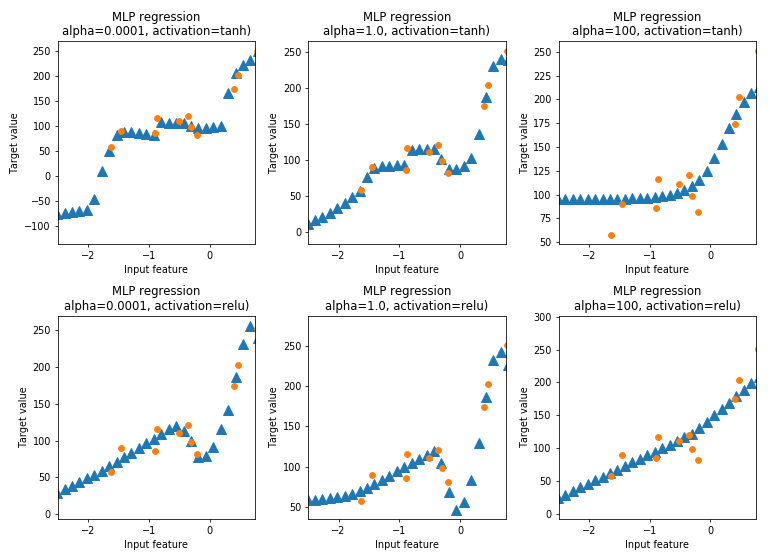

In [20]:
from sklearn.neural_network import MLPRegressor

fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

On the positive side, beyond these simple examples we've shown here, neural networks form the basis of advanced learning architectures that capture complex features, and give state-of-the-art performance on an increasingly wide variety of difficult learning tasks. From world-championship play for the game of Go, to detailed and robust recognition of objects and images. 

However, with this increased power, come __increased costs__.
- This larger and more complex models typically require significant volumes of data, computation, and training time to learn.
- In addition, careful __pre-processing__ of the input data is needed, to help ensure fast, stable, meaningful solutions to finding the optimal set of weights.
- In general, neural networks are a good choice, when the features are of similar types. For example, all derived from the pixels of an image. And less of a good choice, when the features are of very different types. 

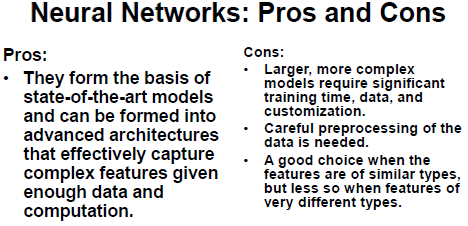

Finally, let's review the key parameters for the multi-layer perceptron in scikit-learn, that can be used to control model complexity. 

The main way to control model complexity for the MLP, is to control the hidden unit size and structure. 

- Using the __hidden_layers_sizes__ parameter that controls the number of hidden layers, and the number of units within each layer.
- __Alpha__ controls the amount of regularization that helps constrain the complexity of the model, by constraining the magnitude of model weights. 
- Finally, you can experiment with at least three different choices for the nonlinear activation function, by using the __activation__ parameter.

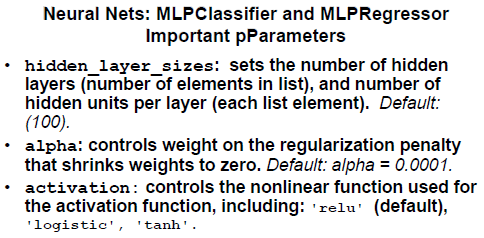

Earlier, we saw the __solver__ parameter, for specifying the algorithm that learns the network weights. Solver is the algorithm that actually does the numerical work of finding the optimal weights. 

And one __intuitive__ way of visualizing this process, is that all of the solver algorithms have to do a kind of __hill-climbing in a very bumpy landscape__, with lots of local minima, where each local minimum corresponds to a locally optimal set of weights. That is, a choice of weight setting that's better than any nearby choices of weights. So across this whole landscape of very bumpy local minima. Some will have higher validation scores on the test data, and some will have lower. 

So depending on the __initial random initialization__ of the weights and the nature of the trajectory in the search path that a solver takes through this bumpy landscape, the solver can end up at different local minima, which can have different validation scores.
- The default solver, adam, tends to be both efficient and effective on large data sets, with thousands of training examples. 
- For small data sets, like many of the ones we use in these examples, the lbfgs solver tends to be faster, and find more effective weights. 

You can find further details on these more advanced settings in the documentation for scikit-learn.


In [17]:
!find . -maxdepth 1 -not -type d

FIND: Parameter format not correct


In [ ]:
!ls readonly

In [ ]:
!cp ./Module 2.ipynb readonly/Module 2.ipynb